In [548]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [549]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression

In [550]:
df_state = pd.read_csv('statewise_road_accidents.csv')
df_month = pd.read_csv('monthwise_accidents_fatalities.csv')
df_roadcat = pd.read_csv('road_category_accidents_fatalities_injuries.csv')
df_roadfeat = pd.read_csv('road_feature_accidents_killed_injured.csv')
df_weather = pd.read_csv('weather_condition_accidents_killed_injured.csv')
df_humanfactors=pd.read_csv('human_factors.csv')

In [551]:
df_state.shape

(38, 14)

In [552]:
df_state.head()

,Sl. No.,State/UT,2019,2020,2021,2022,2023,Absolute Change in 2023 over 2022,% Change in 2023 over 2022,Rank 2019,Rank 2020,Rank 2021,Rank 2022,Rank 2023
0,1,Andhra Pradesh,21992.0,19590.0,21556,21289,19809.0,-1480.0,-6.9,8,8,8,9,9.0
1,2,Arunachal Pradesh,319.0,276.0,245,292,314.0,22.0,7.5,32,32,33,33,33.0
2,3,Assam,8350.0,8559.0,9871,11083,11726.0,643.0,5.8,15,15,15,14,14.0
3,4,Bihar,10307.0,8669.0,9335,10028,11084.0,1056.0,10.5,12,16,16,15,16.0
4,5,Chhattisgarh,11859.0,11696.0,11557,11334,11319.0,-15.0,-0.1,11,12,12,12,15.0


In [553]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Sl. No.                            38 non-null     object 
 1   State/UT                           38 non-null     object 
 2   2019                               37 non-null     float64
 3   2020                               37 non-null     float64
 4   2021                               38 non-null     int64  
 5   2022                               38 non-null     int64  
 6   2023                               37 non-null     float64
 7   Absolute Change in 2023 over 2022  37 non-null     float64
 8   % Change in 2023 over 2022         37 non-null     object 
 9   Rank 2019                          36 non-null     object 
 10  Rank 2020                          36 non-null     object 
 11  Rank 2021                          37 non-null     object 
 

In [554]:
df_state.isna().sum()

Sl. No.                              0
State/UT                             0
2019                                 1
2020                                 1
2021                                 0
2022                                 0
2023                                 1
Absolute Change in 2023 over 2022    1
% Change in 2023 over 2022           1
Rank 2019                            2
Rank 2020                            2
Rank 2021                            1
Rank 2022                            1
Rank 2023                            2
dtype: int64

In [555]:
num_cols = df_state.select_dtypes(include=['int64', 'float64']).columns
df_state[num_cols] = df_state[num_cols].fillna(df_state[num_cols].median())

In [556]:
df_state[num_cols].isna().sum()

2019                                 0
2020                                 0
2021                                 0
2022                                 0
2023                                 0
Absolute Change in 2023 over 2022    0
Rank 2023                            0
dtype: int64

In [557]:
cat_cols = df_state.select_dtypes(include=['object']).columns
df_state[cat_cols] = df_state[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [558]:
df_state[cat_cols].isna().sum()

Sl. No.                       0
State/UT                      0
% Change in 2023 over 2022    0
Rank 2019                     0
Rank 2020                     0
Rank 2021                     0
Rank 2022                     0
dtype: int64

In [559]:
df_month.shape

(12, 3)

In [560]:
df_month.head()

,Month,Accidents,Killed
0,Jan,41841,14610
1,Feb,39022,14279
2,Mar,40549,14907
3,Apr,39138,14438
4,May,43578,16718


In [561]:
df_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Month      12 non-null     object
 1   Accidents  12 non-null     int64 
 2   Killed     12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 420.0+ bytes


In [562]:
df_month.isna().sum()

Month        0
Accidents    0
Killed       0
dtype: int64

In [563]:
df_roadcat.shape

(3, 4)

In [564]:
df_roadcat.shape

(3, 4)

In [565]:
df_roadcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Category               3 non-null      object 
 1   National Highways (%)  3 non-null      float64
 2   State Highways (%)     3 non-null      float64
 3   Other Roads (%)        3 non-null      float64
dtypes: float64(3), object(1)
memory usage: 228.0+ bytes


In [566]:
df_roadcat.isna().sum()

Category                 0
National Highways (%)    0
State Highways (%)       0
Other Roads (%)          0
dtype: int64

In [567]:
df_roadcat

,Category,National Highways (%),State Highways (%),Other Roads (%)
0,Accidents,31.2,22.0,46.8
1,Fatalities,36.5,22.8,40.7
2,Injuries,30.9,23.1,46.0


In [568]:
df_roadfeat.shape

(9, 10)

In [569]:
df_roadfeat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Road Feature        9 non-null      object 
 1   Accidents 2022      9 non-null      int64  
 2   Accidents 2023      9 non-null      int64  
 3   % Change Accidents  9 non-null      float64
 4   Killed 2022         9 non-null      int64  
 5   Killed 2023         9 non-null      int64  
 6   % Change Killed     9 non-null      float64
 7   Injured 2022        9 non-null      int64  
 8   Injured 2023        9 non-null      int64  
 9   % Change Injured    9 non-null      float64
dtypes: float64(3), int64(6), object(1)
memory usage: 852.0+ bytes


In [570]:
df_roadfeat.isna().sum()

Road Feature          0
Accidents 2022        0
Accidents 2023        0
% Change Accidents    0
Killed 2022           0
Killed 2023           0
% Change Killed       0
Injured 2022          0
Injured 2023          0
% Change Injured      0
dtype: int64

In [571]:
# Recompute % Change for Accidents, Killed, Injured
df_roadfeat['% Change Accidents New'] = ((df_roadfeat['Accidents 2023'] - df_roadfeat['Accidents 2022']) 
                                         / df_roadfeat['Accidents 2022'].replace(0, np.nan)) * 100
df_roadfeat['Diff % Change Accidents'] = df_roadfeat['% Change Accidents New'] - df_roadfeat['% Change Accidents']
# Show differences
df_roadfeat[['Road Feature','% Change Accidents','% Change Accidents New','Diff % Change Accidents']]

,Road Feature,% Change Accidents,% Change Accidents New,Diff % Change Accidents
0,Straight road,4.1,4.125505,0.025505
1,Curved road,7.4,7.387394,-0.012606
2,Bridge,10.0,9.267469,-0.732531
3,Culvert,39.6,39.599133,-0.000867
4,Potholes,31.4,31.354026,-0.045974
5,Steep grade,13.8,13.832402,0.032402
6,Ongoing road works/Under construction,2.3,2.323309,0.023309
7,Others,-7.1,-7.067162,0.032838
8,Total,4.2,4.177433,-0.022567


In [572]:
df_roadfeat['% Change Killed New'] = ((df_roadfeat['Killed 2023'] - df_roadfeat['Killed 2022']) 
                                      / df_roadfeat['Killed 2022'].replace(0, np.nan)) * 100
df_roadfeat['Diff % Change Killed'] = df_roadfeat['% Change Killed New'] - df_roadfeat['% Change Killed']
# Show differences
df_roadfeat[['% Change Killed','% Change Killed New','Diff % Change Killed']]

,% Change Killed,% Change Killed New,Diff % Change Killed
0,2.4,2.353888,-0.046112
1,8.2,8.214650,0.014650
2,4.7,4.697987,-0.002013
3,23.0,22.977253,-0.022747
4,16.4,16.433190,0.033190
5,4.8,4.766537,-0.033463
6,-3.7,-3.700049,-0.000049
7,-6.9,-6.889058,0.010942
8,2.6,2.610822,0.010822


In [573]:
df_roadfeat['% Change Injured New'] = ((df_roadfeat['Injured 2023'] - df_roadfeat['Injured 2022']) 
                                       / df_roadfeat['Injured 2022'].replace(0, np.nan)) * 100
df_roadfeat['Diff % Change Injured'] = df_roadfeat['% Change Injured New'] - df_roadfeat['% Change Injured']
# Show differences
df_roadfeat[['% Change Injured','% Change Injured New','Diff % Change Injured']]

,% Change Injured,% Change Injured New,Diff % Change Injured
0,4.4,4.361526,-0.038474
1,6.4,6.409981,0.009981
2,13.2,13.160312,-0.039688
3,47.4,47.440165,0.040165
4,42.2,42.179968,-0.020032
5,20.0,19.980435,-0.019565
6,3.7,3.658077,-0.041923
7,-8.2,-8.234993,-0.034993
8,4.4,4.388925,-0.011075


In [574]:
df_roadfeat.drop(columns=['% Change Accidents','% Change Killed','% Change Injured'], inplace=True)

df_roadfeat.rename(columns={
    '% Change Accidents New':'% Change Accidents',
    '% Change Killed New':'% Change Killed',
    '% Change Injured New':'% Change Injured'
}, inplace=True)

In [575]:
df_roadfeat.head()

,Road Feature,Accidents 2022,Accidents 2023,Killed 2022,Killed 2023,Injured 2022,Injured 2023,% Change Accidents,Diff % Change Accidents,% Change Killed,Diff % Change Killed,% Change Injured,Diff % Change Injured
0,Straight road,309247,322005,111815,114447,297694,310678,4.125505,0.025505,2.353888,-0.046112,4.361526,-0.038474
1,Curved road,54593,58626,20573,22263,55866,59447,7.387394,-0.012606,8.214650,0.014650,6.409981,0.009981
2,Bridge,14211,15528,6258,6552,13062,14781,9.267469,-0.732531,4.697987,-0.002013,13.160312,-0.039688
3,Culvert,7384,10308,3473,4271,6309,9302,39.599133,-0.000867,22.977253,-0.022747,47.440165,0.040165
4,Potholes,4446,5840,1856,2161,3734,5309,31.354026,-0.045974,16.433190,0.033190,42.179968,-0.020032


In [576]:
df_weather.head()

,Weather Condition,Accidents 2022,Accidents 2023,% Change Accidents,Killed 2022,Killed 2023,% Change Killed,Injured 2022,Injured 2023,% Change Injured
0,Sunny/clear,342516,365865,6.8,119585,125065,4.6,332586,359074,8.0
1,Rainy,38329,37316,-2.6,14773,13734,-7.0,36950,36102,-2.3
2,Foggy & misty,34262,34266,0.0,14583,14617,0.2,30796,30646,-0.5
3,Hail/sleet,4083,3378,-17.3,1871,1516,-19.0,3621,3064,-15.4
4,Others,42122,39758,-5.6,17679,17958,1.6,39413,33939,-13.9


In [577]:
df_weather.isna().sum()

Weather Condition     0
Accidents 2022        0
Accidents 2023        0
% Change Accidents    0
Killed 2022           0
Killed 2023           0
% Change Killed       0
Injured 2022          0
Injured 2023          0
% Change Injured      0
dtype: int64

In [578]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weather Condition   6 non-null      object 
 1   Accidents 2022      6 non-null      int64  
 2   Accidents 2023      6 non-null      int64  
 3   % Change Accidents  6 non-null      float64
 4   Killed 2022         6 non-null      int64  
 5   Killed 2023         6 non-null      int64  
 6   % Change Killed     6 non-null      float64
 7   Injured 2022        6 non-null      int64  
 8   Injured 2023        6 non-null      int64  
 9   % Change Injured    6 non-null      float64
dtypes: float64(3), int64(6), object(1)
memory usage: 612.0+ bytes


In [579]:
df_weather['% Change Accidents New'] = ((df_weather['Accidents 2023'] - df_weather['Accidents 2022']) 
                                        / df_weather['Accidents 2022'].replace(0, np.nan)) * 100
df_weather['Diff % Change Accidents'] = df_weather['% Change Accidents New'] - df_weather['% Change Accidents']
# Show rows where difference exists
df_weather[['Weather Condition','% Change Accidents','% Change Accidents New','Diff % Change Accidents']]

,Weather Condition,% Change Accidents,% Change Accidents New,Diff % Change Accidents
0,Sunny/clear,6.8,6.816908,0.016908
1,Rainy,-2.6,-2.642907,-0.042907
2,Foggy & misty,0.0,0.011675,0.011675
3,Hail/sleet,-17.3,-17.266716,0.033284
4,Others,-5.6,-5.612269,-0.012269
5,Total,4.2,4.177433,-0.022567


In [580]:
df_weather['% Change Killed New'] = ((df_weather['Killed 2023'] - df_weather['Killed 2022']) 
                                     / df_weather['Killed 2022'].replace(0, np.nan)) * 100
df_weather['Diff % Change Killed'] = df_weather['% Change Killed New'] - df_weather['% Change Killed']
# Show rows where difference exists
df_weather[['Weather Condition','% Change Accidents','% Change Killed New','Diff % Change Killed']]

,Weather Condition,% Change Accidents,% Change Killed New,Diff % Change Killed
0,Sunny/clear,6.8,4.582515,-0.017485
1,Rainy,-2.6,-7.033101,-0.033101
2,Foggy & misty,0.0,0.233148,0.033148
3,Hail/sleet,-17.3,-18.973811,0.026189
4,Others,-5.6,1.578144,-0.021856
5,Total,4.2,2.610822,0.010822


In [581]:
df_weather['% Change Injured New'] = ((df_weather['Injured 2023'] - df_weather['Injured 2022']) 
                                      / df_weather['Injured 2022'].replace(0, np.nan)) * 100
df_weather['Diff % Change Injured'] = df_weather['% Change Injured New'] - df_weather['% Change Injured']
# Show rows where difference exists
df_weather[['Weather Condition','% Change Accidents','% Change Injured New','Diff % Change Injured']]

,Weather Condition,% Change Accidents,% Change Injured New,Diff % Change Injured
0,Sunny/clear,6.8,7.964256,-0.035744
1,Rainy,-2.6,-2.294993,0.005007
2,Foggy & misty,0.0,-0.487076,0.012924
3,Hail/sleet,-17.3,-15.382491,0.017509
4,Others,-5.6,-13.888818,0.011182
5,Total,4.2,4.388925,-0.011075


In [582]:
df_weather.drop(columns=['% Change Accidents','% Change Killed','% Change Injured'], inplace=True)
df_weather.rename(columns={
    '% Change Accidents New':'% Change Accidents',
    '% Change Killed New':'% Change Killed',
    '% Change Injured New':'% Change Injured'
}, inplace=True)

In [583]:
df_weather.head()

,Weather Condition,Accidents 2022,Accidents 2023,Killed 2022,Killed 2023,Injured 2022,Injured 2023,% Change Accidents,Diff % Change Accidents,% Change Killed,Diff % Change Killed,% Change Injured,Diff % Change Injured
0,Sunny/clear,342516,365865,119585,125065,332586,359074,6.816908,0.016908,4.582515,-0.017485,7.964256,-0.035744
1,Rainy,38329,37316,14773,13734,36950,36102,-2.642907,-0.042907,-7.033101,-0.033101,-2.294993,0.005007
2,Foggy & misty,34262,34266,14583,14617,30796,30646,0.011675,0.011675,0.233148,0.033148,-0.487076,0.012924
3,Hail/sleet,4083,3378,1871,1516,3621,3064,-17.266716,0.033284,-18.973811,0.026189,-15.382491,0.017509
4,Others,42122,39758,17679,17958,39413,33939,-5.612269,-0.012269,1.578144,-0.021856,-13.888818,0.011182


In [584]:
df_humanfactors.shape

(7, 7)

In [585]:
df_humanfactors.isna().sum()

Category                                              0
National Highways under NHAI Accidents                0
National Highways under NHAI Deaths                   0
National State Highways under PWD Accidents           0
National State Highways under PWD Deaths              0
National Other Highways under department Accidents    0
National Other Highways under department Deaths       0
dtype: int64

In [586]:
df_humanfactors['Category']

0                                    Over-speeding
1    Drunken driving/consumption of alcohol & drug
2                            Driving on wrong side
3                                Jumping red light
4                              Use of mobile phone
5                                           Others
6                                            Total
Name: Category, dtype: object

In [587]:
df_humanfactors['Category'].fillna(df_humanfactors['Category'].mode()[0], inplace=True)

In [588]:
df_humanfactors.isna().sum()

Category                                              0
National Highways under NHAI Accidents                0
National Highways under NHAI Deaths                   0
National State Highways under PWD Accidents           0
National State Highways under PWD Deaths              0
National Other Highways under department Accidents    0
National Other Highways under department Deaths       0
dtype: int64

In [589]:
df_humanfactors.head()

,Category,National Highways under NHAI Accidents,National Highways under NHAI Deaths,National State Highways under PWD Accidents,National State Highways under PWD Deaths,National Other Highways under department Accidents,National Other Highways under department Deaths
0,Over-speeding,78774,35385,24856,8146,5138,2243
1,Drunken driving/consumption of alcohol & drug,1730,1006,649,307,311,129
2,Driving on wrong side,5053,2389,1818,736,725,233
3,Jumping red light,344,162,129,49,56,18
4,Use of mobile phone,1465,718,537,244,239,85


In [590]:
df_humanfactors=df_humanfactors.replace({',': ''}, regex=True) 

In [591]:
df_humanfactors

,Category,National Highways under NHAI Accidents,National Highways under NHAI Deaths,National State Highways under PWD Accidents,National State Highways under PWD Deaths,National Other Highways under department Accidents,National Other Highways under department Deaths
0,Over-speeding,78774,35385,24856,8146,5138,2243
1,Drunken driving/consumption of alcohol & drug,1730,1006,649,307,311,129
2,Driving on wrong side,5053,2389,1818,736,725,233
3,Jumping red light,344,162,129,49,56,18
4,Use of mobile phone,1465,718,537,244,239,85
5,Others,18686,8267,8528,2474,1139,521
6,Total,106052,47927,36517,11956,7608,3229


In [592]:
df_humanfactors = df_humanfactors['Category'].str.lower()

In [593]:
df_humanfactors.head()

0                                    over-speeding
1    drunken driving/consumption of alcohol & drug
2                            driving on wrong side
3                                jumping red light
4                              use of mobile phone
Name: Category, dtype: object

In [594]:
import pandas as pd

# Load human factors dataset with multi-level header
df_human = pd.read_csv('human_factors.csv', header=[0,1])

# Flatten multi-level header
new_cols = []
for col in df_human.columns:
    if col[1]:  # if sub-header exists, combine it
        new_cols.append(f'{col[0]} {col[1]}'.strip())
    else:  # main header only
        new_cols.append(col[0].strip())
df_human.columns = new_cols

# Display columns to verify
print("Columns after flattening:")
print(df_human.columns.tolist())

Columns after flattening:
['Category Over-speeding', 'National Highways under NHAI Accidents 78774', 'National Highways under NHAI Deaths 35385', 'National State Highways under PWD Accidents 24856', 'National State Highways under PWD Deaths 8146', 'National Other Highways under department Accidents 5138', 'National Other Highways under department Deaths 2243']


In [595]:
import pandas as pd

# Load the state-wise data you shared
df_states = pd.read_csv('statewise_road_accidents.csv')

# Drop unnecessary columns to simplify the dataframe
df_states = df_states.drop(columns=['Sl. No.', 'Rank 2019', 'Rank 2020', 'Rank 2021', 'Rank 2022', 'Rank 2023'])

# Display the top 5 states with the highest number of road accidents in 2023
top_5_accident_states = df_states.sort_values(by='2023', ascending=False).head(5)

print("Top 5 states by number of road accidents in 2023:")
print(top_5_accident_states)

Top 5 states by number of road accidents in 2023:
          State/UT     2019     2020   2021   2022     2023  \
22      Tamil Nadu  62055.0  48921.0  58525  61603  64311.0   
12  Madhya Pradesh  50265.0  37501.0  32267  43109  45817.0   
10       Karnataka  42015.0  34178.0  32647  39736  43404.0   
13     Maharashtra  39669.0  30667.0  32002  38747  43187.0   
20       Rajasthan  23480.0  20778.0  21466  23865  24774.0   

    Absolute Change in 2023 over 2022 % Change in 2023 over 2022  
22                             2708.0                        4.4  
12                             2708.0                        6.3  
10                             3678.0                        9.3  
13                             3440.0                        8.9  
20                              909.0                        3.8  


In [596]:
import pandas as pd

# Load dataset with multi-level header
df_human = pd.read_csv('human_factors.csv', header=[0, 1])

# Flatten multi-level columns
new_cols = []
for col in df_human.columns:
    if col[1]:
        new_cols.append(f"{col[0]} {col[1]}".strip())
    else:
        new_cols.append(col[0].strip())
df_human.columns = new_cols

# Find the exact 'Category' column
category_col = [c for c in df_human.columns if "Category" in c][0]

# Fill missing values in Category safely
df_human[category_col] = df_human[category_col].fillna(df_human[category_col].mode()[0])

# Fill numeric columns safely
for col in df_human.columns:
    if col != category_col:
        # Remove commas and convert to numeric
        df_human[col] = pd.to_numeric(df_human[col].astype(str).str.replace(',', ''), errors='coerce')
        # Fill NaN with mean
        df_human[col] = df_human[col].fillna(df_human[col].mean())

print("Human factors dataset cleaned safely without FutureWarnings!")

Human factors dataset cleaned safely without FutureWarnings!


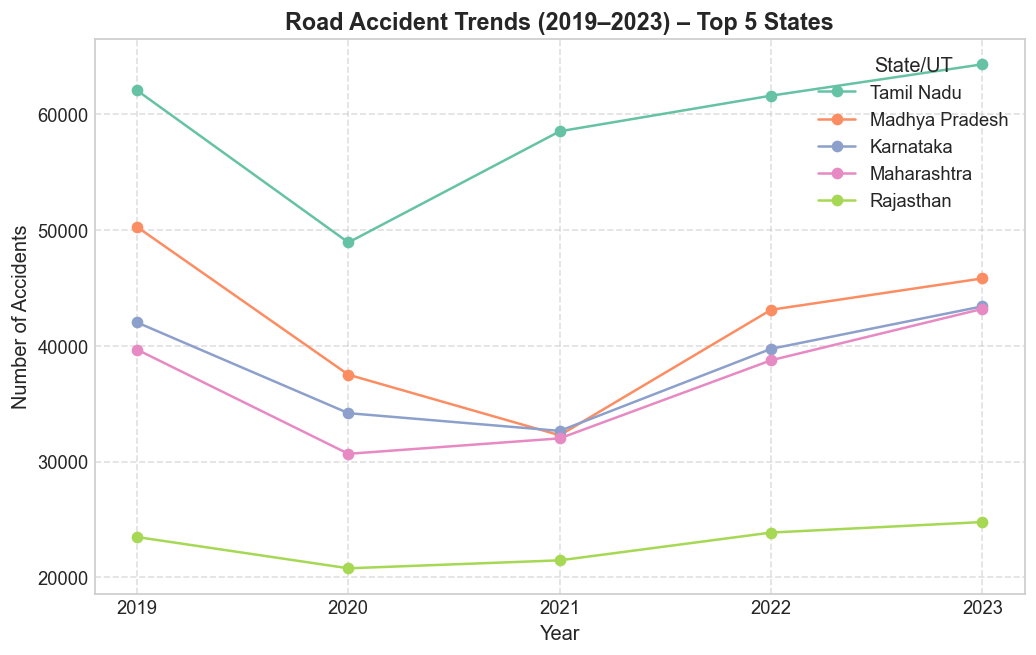

In [597]:
# Select only the needed columns (2019–2023) for the top 5 states
trend_cols = ["2019", "2020", "2021", "2022", "2023"]

plt.figure(figsize=(10,6))

# Plot each state's accident trend
for _, row in top_5_accident_states.iterrows():
    plt.plot(trend_cols, 
             row[trend_cols], 
             marker="o", 
             label=row["State/UT"])

plt.title("Road Accident Trends (2019–2023) – Top 5 States", fontsize=14, weight="bold")
plt.ylabel("Number of Accidents")
plt.xlabel("Year")
plt.legend(title="State/UT")
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

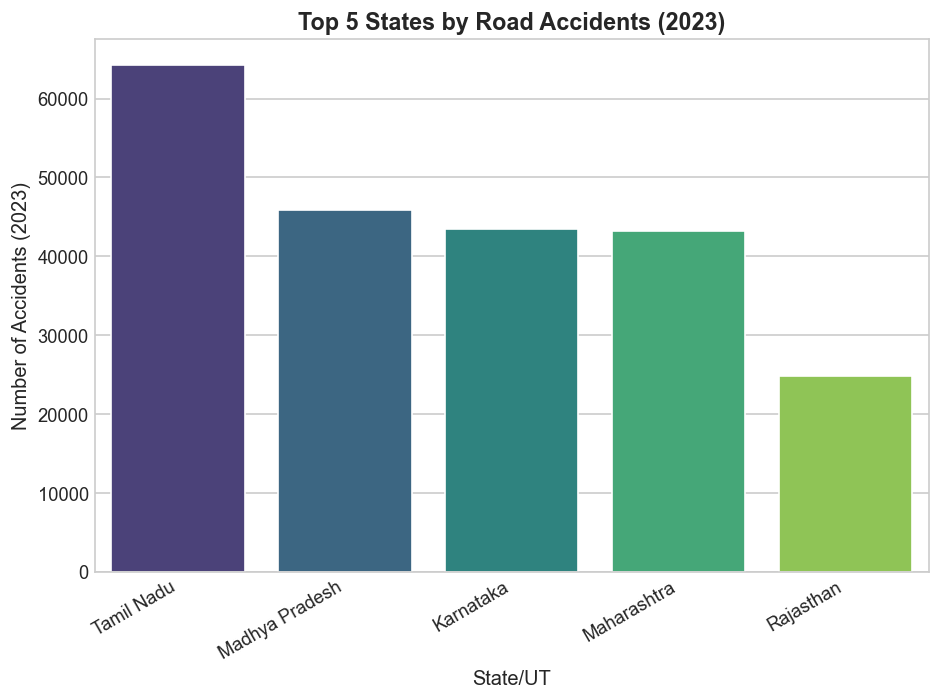

In [598]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=top_5_accident_states,
    x="State/UT", 
    y="2023",
    hue="State/UT",       # assign hue to avoid warning
    palette="viridis",
    dodge=False,          # ensures no side-by-side duplication
    legend=False          # remove duplicate legend
)

plt.title("Top 5 States by Road Accidents (2023)", fontsize=14, weight="bold")
plt.ylabel("Number of Accidents (2023)")
plt.xlabel("State/UT")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [599]:
import pandas as pd

# Load the road feature data
df_road_features = pd.read_csv('road_feature_accidents_killed_injured.csv')

# Drop the 'Total' row as it's a summary and not a feature
df_road_features = df_road_features[df_road_features['Road Feature'] != 'Total'].copy()

# Find the top 5 road features by accidents in 2023
top_5_accident_features = df_road_features.sort_values(by='Accidents 2023', ascending=False).head(5)
print("Top 5 Road Features by Accidents in 2023:")
print(top_5_accident_features[['Road Feature', 'Accidents 2023']])

# Find the top 5 road features by fatalities in 2023
top_5_fatality_features = df_road_features.sort_values(by='Killed 2023', ascending=False).head(5)
print("\nTop 5 Road Features by Fatalities in 2023:")
print(top_5_fatality_features[['Road Feature', 'Killed 2023']])

# Find the top 5 road features by injuries in 2023
top_5_injury_features = df_road_features.sort_values(by='Injured 2023', ascending=False).head(5)
print("\nTop 5 Road Features by Injuries in 2023:")
print(top_5_injury_features[['Road Feature', 'Injured 2023']])

Top 5 Road Features by Accidents in 2023:
    Road Feature  Accidents 2023
0  Straight road          322005
1    Curved road           58626
7         Others           53757
2         Bridge           15528
3        Culvert           10308

Top 5 Road Features by Fatalities in 2023:
    Road Feature  Killed 2023
0  Straight road       114447
1    Curved road        22263
7         Others        17138
2         Bridge         6552
3        Culvert         4271

Top 5 Road Features by Injuries in 2023:
    Road Feature  Injured 2023
0  Straight road        310678
1    Curved road         59447
7         Others         50156
2         Bridge         14781
3        Culvert          9302


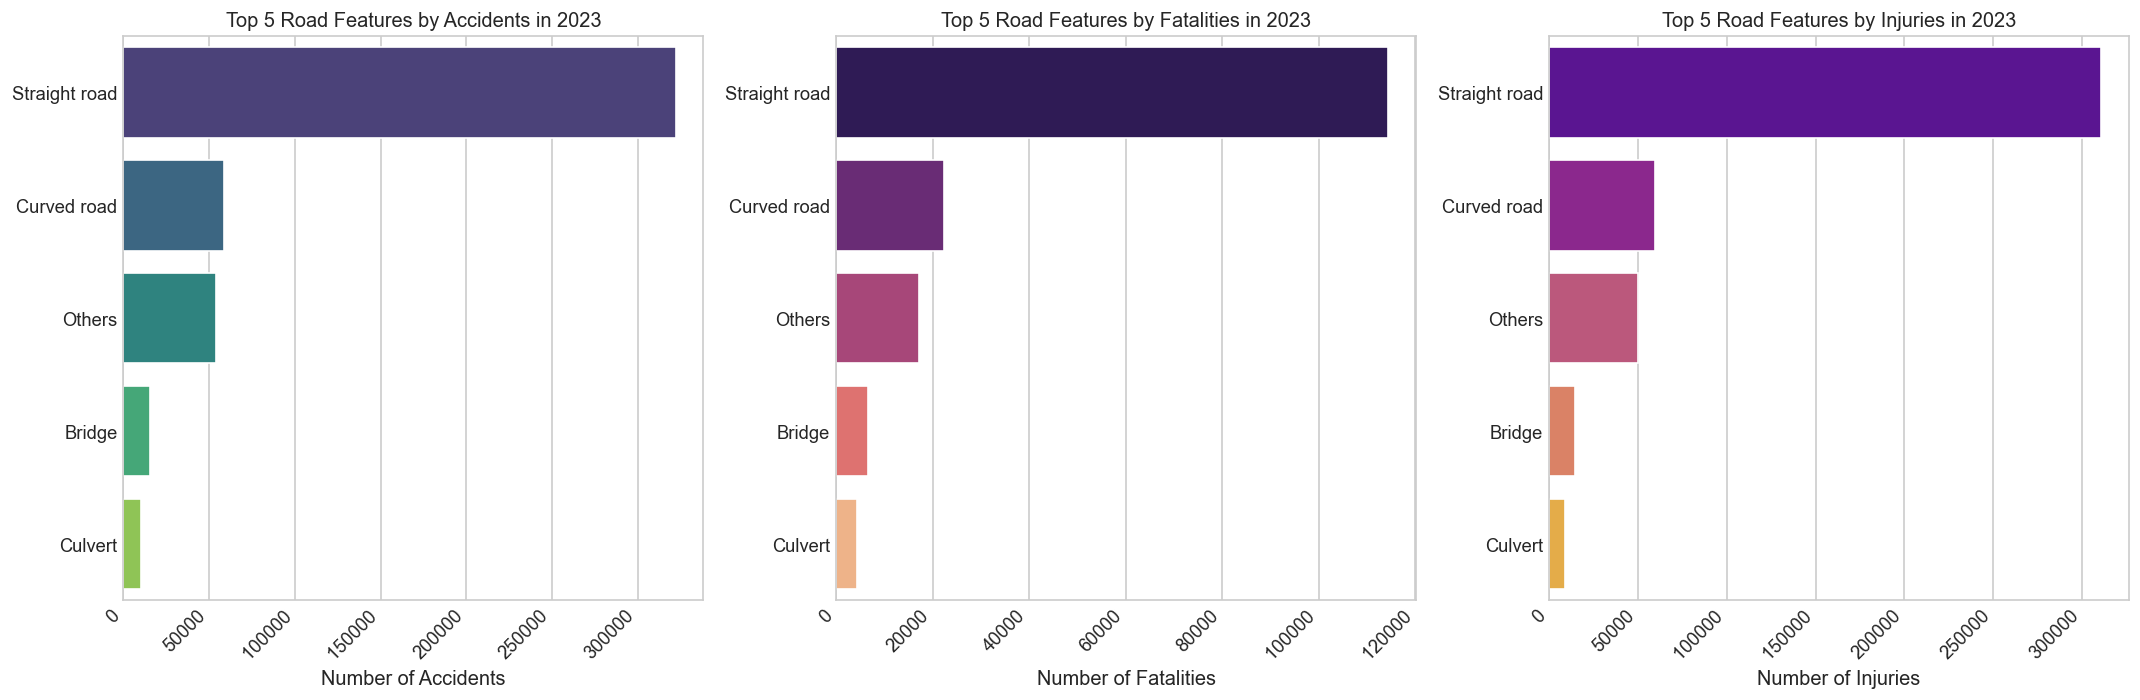

In [600]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataframes for the top 5 features
top_5_accident_features_data = {'Road Feature': ['Straight road', 'Curved road', 'Others', 'Bridge', 'Culvert'],
                                'Accidents 2023': [322005, 58626, 53757, 15528, 10308]}
df_accidents = pd.DataFrame(top_5_accident_features_data)

top_5_fatality_features_data = {'Road Feature': ['Straight road', 'Curved road', 'Others', 'Bridge', 'Culvert'],
                                'Killed 2023': [114447, 22263, 17138, 6552, 4271]}
df_fatalities = pd.DataFrame(top_5_fatality_features_data)

top_5_injury_features_data = {'Road Feature': ['Straight road', 'Curved road', 'Others', 'Bridge', 'Culvert'],
                              'Injured 2023': [310678, 59447, 50156, 14781, 9302]}
df_injuries = pd.DataFrame(top_5_injury_features_data)

# Create the bar charts
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(18, 6))

# Accidents Bar Chart
plt.subplot(1, 3, 1)
sns.barplot(x='Accidents 2023', y='Road Feature', data=df_accidents, palette='viridis', hue='Road Feature', legend=False)
plt.title('Top 5 Road Features by Accidents in 2023')
plt.xlabel('Number of Accidents')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')

# Fatalities Bar Chart
plt.subplot(1, 3, 2)
sns.barplot(x='Killed 2023', y='Road Feature', data=df_fatalities, palette='magma', hue='Road Feature', legend=False)
plt.title('Top 5 Road Features by Fatalities in 2023')
plt.xlabel('Number of Fatalities')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')

# Injuries Bar Chart
plt.subplot(1, 3, 3)
sns.barplot(x='Injured 2023', y='Road Feature', data=df_injuries, palette='plasma', hue='Road Feature', legend=False)
plt.title('Top 5 Road Features by Injuries in 2023')
plt.xlabel('Number of Injuries')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

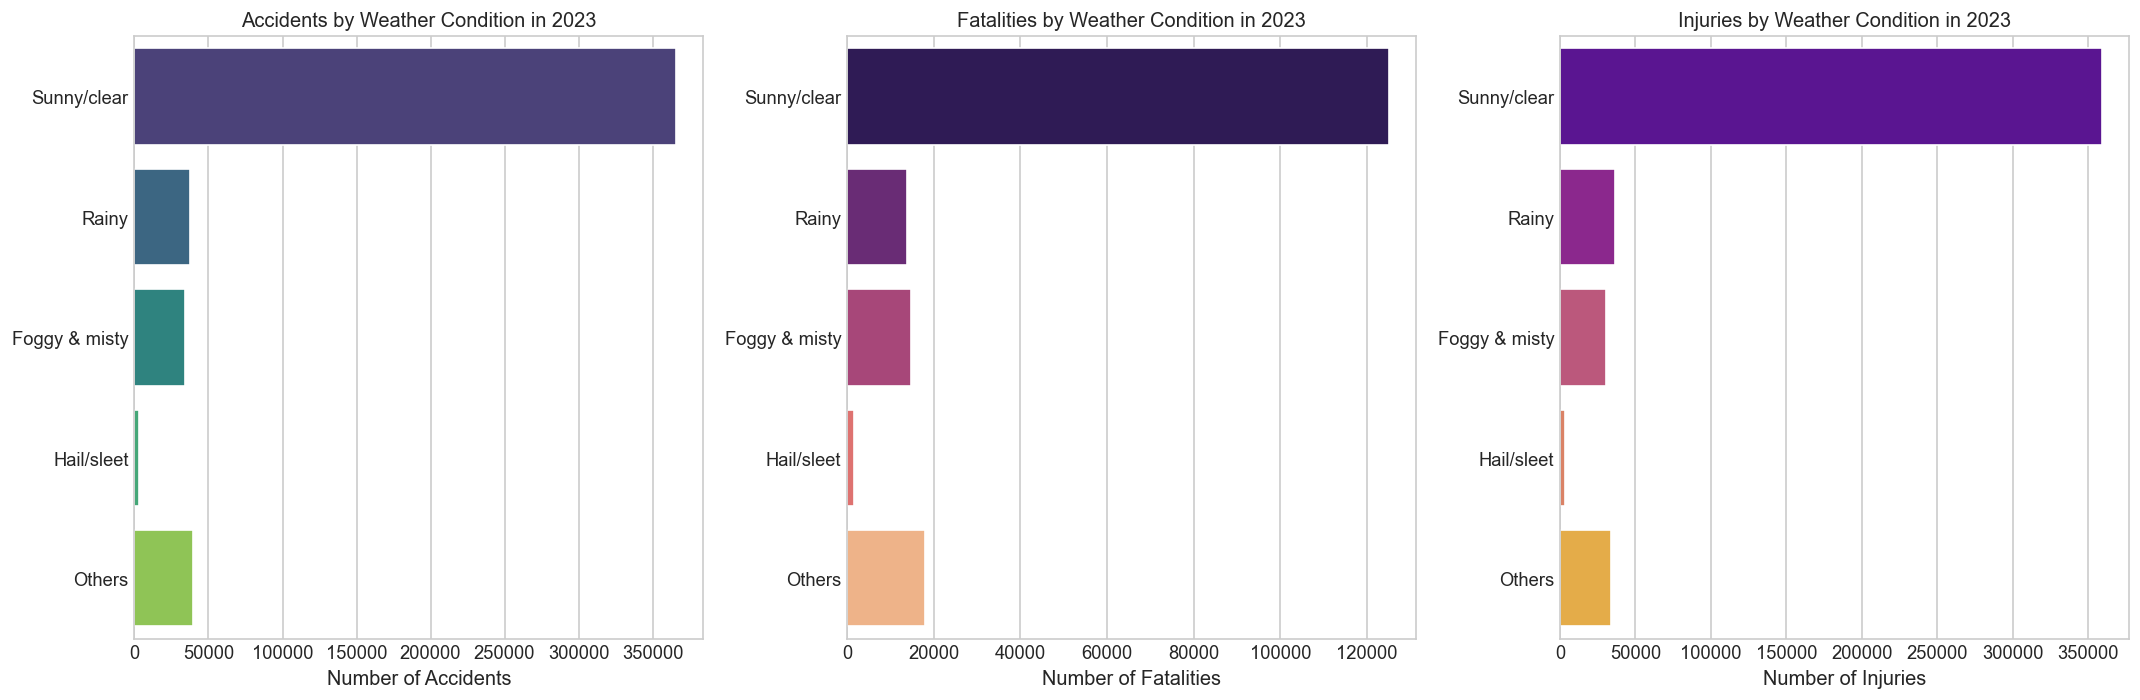

In [601]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the weather condition data
df_weather = pd.read_csv('weather_condition_accidents_killed_injured.csv')

# Drop the 'Total' row as it's a summary
df_weather = df_weather[df_weather['Weather Condition'] != 'Total'].copy()

# Set up the plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(18, 6))

# Accidents Bar Chart
plt.subplot(1, 3, 1)
sns.barplot(x='Accidents 2023', y='Weather Condition', data=df_weather, palette='viridis', hue='Weather Condition', legend=False)
plt.title('Accidents by Weather Condition in 2023')
plt.xlabel('Number of Accidents')
plt.ylabel('')

# Fatalities Bar Chart
plt.subplot(1, 3, 2)
sns.barplot(x='Killed 2023', y='Weather Condition', data=df_weather, palette='magma', hue='Weather Condition', legend=False)
plt.title('Fatalities by Weather Condition in 2023')
plt.xlabel('Number of Fatalities')
plt.ylabel('')

# Injuries Bar Chart
plt.subplot(1, 3, 3)
sns.barplot(x='Injured 2023', y='Weather Condition', data=df_weather, palette='plasma', hue='Weather Condition', legend=False)
plt.title('Injuries by Weather Condition in 2023')
plt.xlabel('Number of Injuries')
plt.ylabel('')

plt.tight_layout()
plt.show()

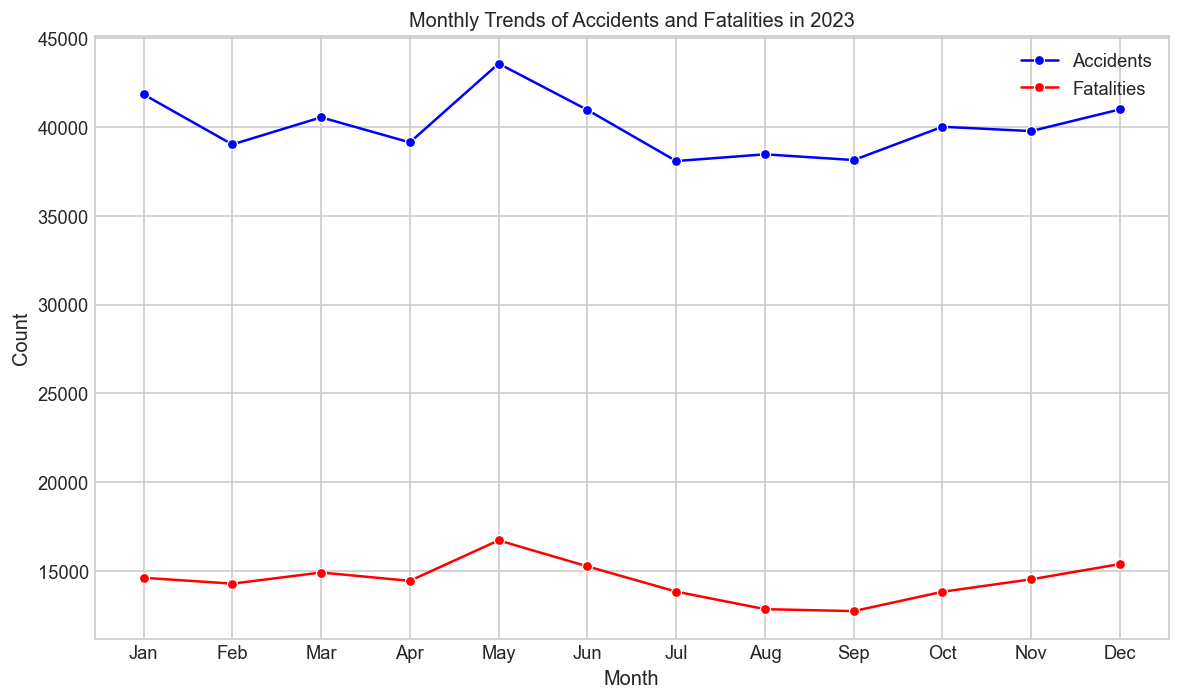

In [602]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the monthly data
df_monthly = pd.read_csv('monthwise_accidents_fatalities.csv')

# Convert the month names to a categorical type for correct ordering
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_monthly['Month'] = pd.Categorical(df_monthly['Month'], categories=month_order, ordered=True)

# Set up the plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

# Create the line plot for both accidents and fatalities
sns.lineplot(x='Month', y='Accidents', data=df_monthly, marker='o', label='Accidents', color='blue')
sns.lineplot(x='Month', y='Killed', data=df_monthly, marker='o', label='Fatalities', color='red')

plt.title('Monthly Trends of Accidents and Fatalities in 2023')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

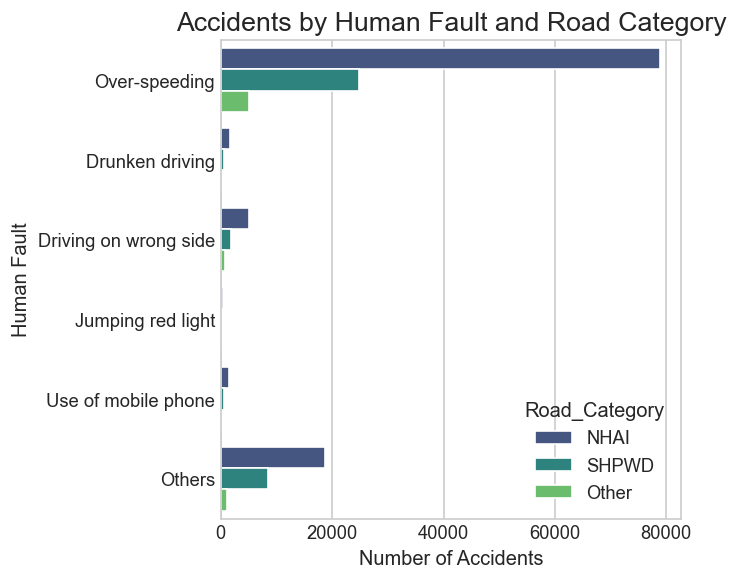

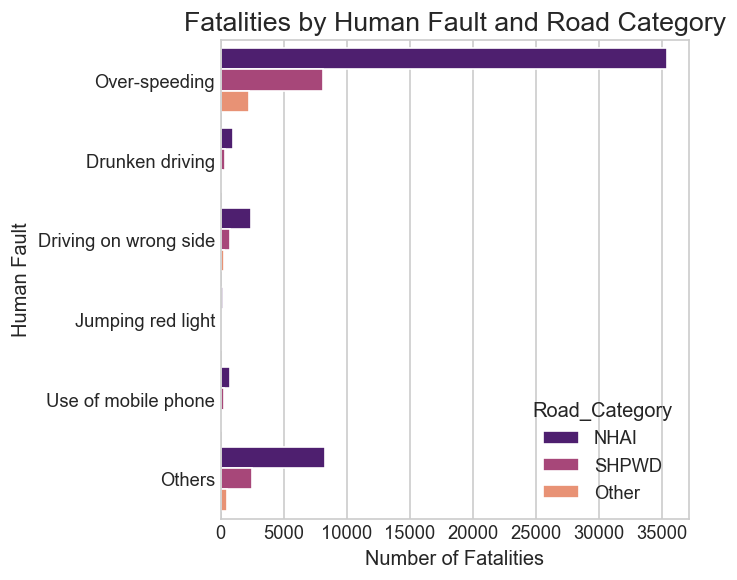

In [603]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DataFrame from your data
# This is a safe way to ensure the data is correctly structured
data = {
    'Category': ['Over-speeding', 'Drunken driving', 'Driving on wrong side', 'Jumping red light', 'Use of mobile phone', 'Others', 'Total'],
    'Accidents_NHAI': [78774, 1730, 5053, 344, 1465, 18686, 106052],
    'Deaths_NHAI': [35385, 1006, 2389, 162, 718, 8267, 47927],
    'Accidents_SHPWD': [24856, 649, 1818, 129, 537, 8528, 36517],
    'Deaths_SHPWD': [8146, 307, 736, 49, 244, 2474, 11956],
    'Accidents_Other': [5138, 311, 725, 56, 239, 1139, 7608],
    'Deaths_Other': [2243, 129, 233, 18, 85, 521, 3229],
}
df_humanfactors = pd.DataFrame(data)

# Reshape the DataFrame to a long format suitable for plotting
df_melted = df_humanfactors.melt(id_vars='Category', var_name='Metric', value_name='Count')

# Split the 'Metric' column into a 'Type' and 'Road_Category'
df_melted[['Type', 'Road_Category']] = df_melted['Metric'].str.split('_', expand=True)

# Filter out the 'Total' rows for a cleaner visualization
df_viz = df_melted[df_melted['Category'] != 'Total'].copy()

# Set up the plotting style
plt.style.use('seaborn-v0_8-whitegrid')

# Create a bar chart for Accidents
plt.figure(figsize=(6, 5))
sns.barplot(x='Count', y='Category', hue='Road_Category', data=df_viz[df_viz['Type'] == 'Accidents'], palette='viridis')
plt.title('Accidents by Human Fault and Road Category', fontsize=16)
plt.xlabel('Number of Accidents')
plt.ylabel('Human Fault')
plt.tight_layout()
plt.show()

# Create a bar chart for Fatalities
plt.figure(figsize=(6, 5))
sns.barplot(x='Count', y='Category', hue='Road_Category', data=df_viz[df_viz['Type'] == 'Deaths'], palette='magma')
plt.title('Fatalities by Human Fault and Road Category', fontsize=16)
plt.xlabel('Number of Fatalities')
plt.ylabel('Human Fault')
plt.tight_layout()
plt.show()

  Weather Condition  Accidents 2022  Accidents 2023  % Change Accidents  \
0       Sunny/clear          342516          365865                 6.8   
1             Rainy           38329           37316                -2.6   
2     Foggy & misty           34262           34266                 0.0   
3        Hail/sleet            4083            3378               -17.3   
4            Others           42122           39758                -5.6   

   Killed 2022  Killed 2023  % Change Killed  Injured 2022  Injured 2023  \
0       119585       125065              4.6        332586        359074   
1        14773        13734             -7.0         36950         36102   
2        14583        14617              0.2         30796         30646   
3         1871         1516            -19.0          3621          3064   
4        17679        17958              1.6         39413         33939   

   % Change Injured  
0               8.0  
1              -2.3  
2              -0.5  
3   

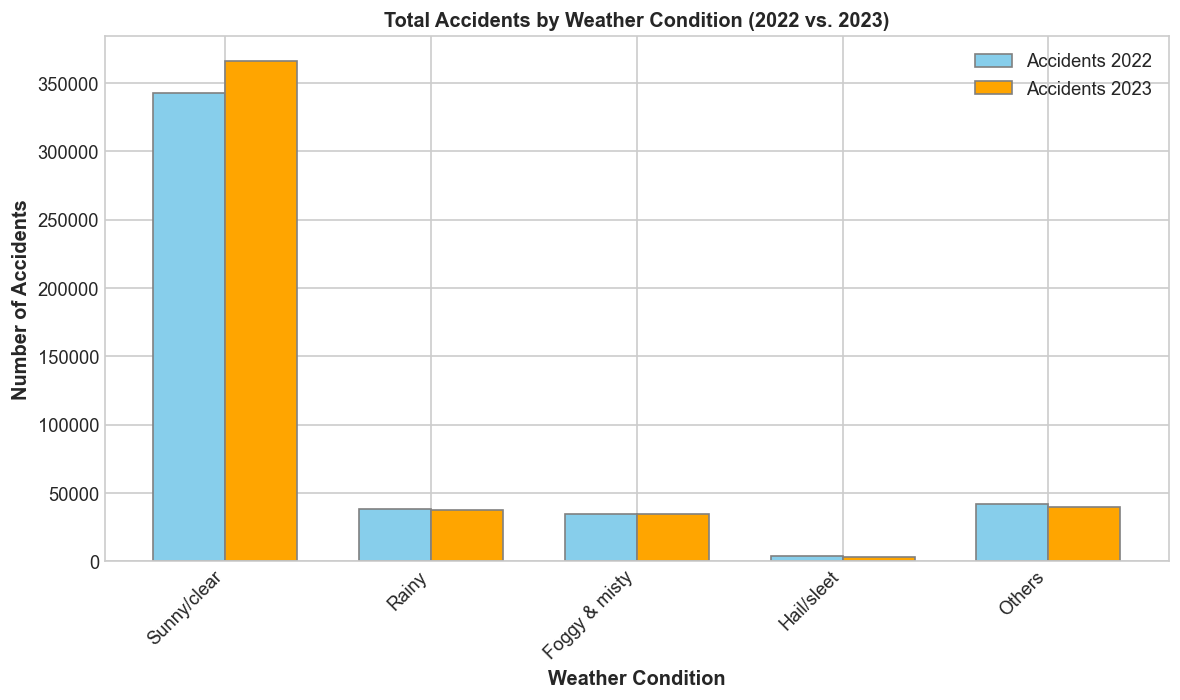

In [608]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('weather_condition_accidents_killed_injured.csv')

# Display the first few rows and information about the DataFrame
print(df.head())
print(df.info())

# Exclude the 'Total' row from the data for plotting
df_plot = df[df['Weather Condition'] != 'Total'].copy()

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define the bar width and position for each year
bar_width = 0.35
r1 = np.arange(len(df_plot['Weather Condition']))
r2 = [x + bar_width for x in r1]

# Create the bars for 2022 and 2023 accidents
plt.bar(r1, df_plot['Accidents 2022'], color='skyblue', width=bar_width, edgecolor='grey', label='Accidents 2022')
plt.bar(r2, df_plot['Accidents 2023'], color='orange', width=bar_width, edgecolor='grey', label='Accidents 2023')

# Add labels, title, and legend
plt.xlabel('Weather Condition', fontweight='bold')
plt.ylabel('Number of Accidents', fontweight='bold')
plt.title('Total Accidents by Weather Condition (2022 vs. 2023)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in r1], df_plot['Weather Condition'], rotation=45, ha='right')
plt.legend()

# Ensure the labels are not cut off
plt.tight_layout()

# Save the figure
plt.savefig('accidents_by_weather_condition.png')
print('Chart saved as accidents_by_weather_condition.png')

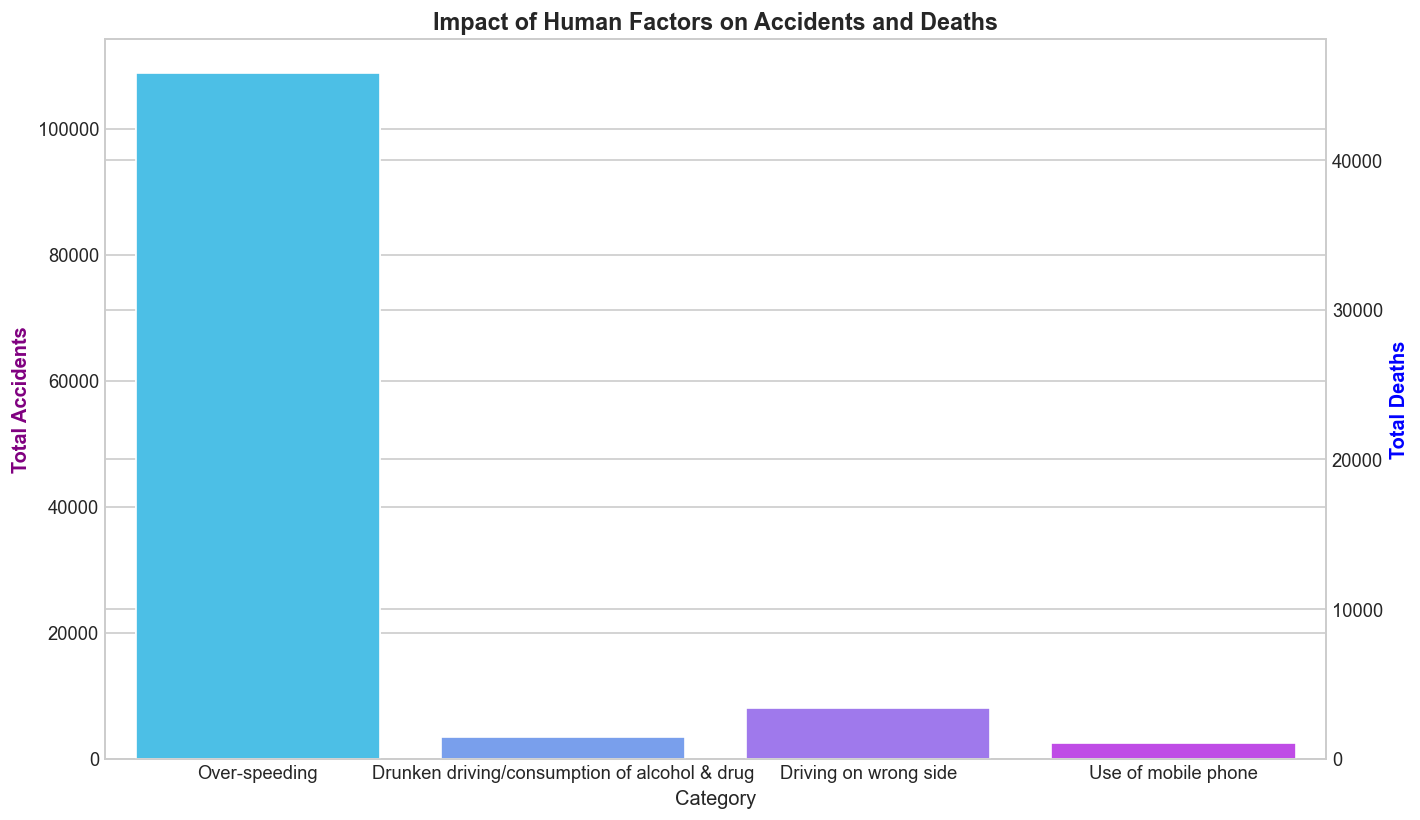

In [615]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned human factors CSV
df_human = pd.read_csv('human_factors.csv')

# Keep only key factors
factors_of_interest = [
    'Over-speeding',
    'Drunken driving/consumption of alcohol & drug',
    'Use of mobile phone',
    'Driving on wrong side'
]
df_human = df_human[df_human['Category'].isin(factors_of_interest)].copy()

# Sum total accidents across all road types for each factor
df_human['Total_Accidents'] = df_human[['National Highways Accidents', 
                                        'State Highways Accidents', 
                                        'Other Roads Accidents']].sum(axis=1)

# Sum total deaths across all road types for each factor
df_human['Total_Deaths'] = df_human[['National Highways Deaths', 
                                     'State Highways Deaths', 
                                     'Other Roads Deaths']].sum(axis=1)

# --- Visualization ---
plt.figure(figsize=(12, 7))

# Plot total accidents
sns.barplot(
    x='Category',
    y='Total_Accidents',
    data=df_human,
    hue='Category',       # fixes the future warning
    dodge=False,
    palette='magma',
    legend=False
)

# Overlay deaths on secondary axis
ax1 = plt.gca()
ax2 = ax1.twinx()
sns.barplot(
    x='Category',
    y='Total_Deaths',
    data=df_human,
    hue='Category',
    dodge=False,
    palette='cool',
    legend=False,
    ax=ax2
)

# Axis labels and title
ax1.set_ylabel('Total Accidents', fontweight='bold', color='purple')
ax2.set_ylabel('Total Deaths', fontweight='bold', color='blue')
plt.title('Impact of Human Factors on Accidents and Deaths', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()

# Save and show plot
plt.savefig('human_factors_accidents_deaths.png')
plt.show()